In [46]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import time
from tqdm import tqdm
import gsd.hoomd 

from matplotlib import cm
from matplotlib.colors import Normalize


In [9]:
import sys
import os

# Absolute path to your module's directory
module_path = os.path.abspath('/localscratch/zippoema/git/HPA/src/')
if module_path not in sys.path:
    sys.path.insert(0, module_path)

import hpa.rates as hpar  # Now this should work

In [21]:
plt.style.use('default')
plt.style.use('/localscratch/zippoema/md_plots/rates_plot.mplstyle')

In [15]:
path_CAL = '/media/zippoema/Elements/zippo_phd_data/project_hps_phospho_tdp43_natcomm/single-tdp43/data_CALVADOS3/'
path_new = '/media/zippoema/Elements/zippo_phd_data/new_data/'

In [11]:
ser_i = np.array([266, 273, 292, 305, 317, 332, 333, 342, 347, 350, 369, 373, 375, 377, 379, 387, 389, 393, 395, 403, 404, 407, 409, 410])-260-1 
ser_i_full = ser_i+121 
ser_i_equi = np.linspace(8, 146, 24, dtype=int)
n_ser = len(ser_i)


## CK1d + TDP-43 LCD

In [17]:
rp, drp = hpar.estimator_rate_single_exponential(dirpath=path_CAL+'sim_sh_network_ck1d/', file_suffix='ck1d_tdp43_CALVADOS3_network_b30_250K_contacts.txt',
                                                  ser_l=ser_i, n_sims=50, max_time=2*10**8)
rp *= 10**8      # units \mu s^-1
drp *= 10**8

rp_f, drp_f = hpar.estimator_rate_single_exponential(dirpath=path_CAL+'sim_sh_network_full_ck1d/', file_suffix='full-ck1d_tdp43_CALVADOS3_network_b30_250K_contacts.txt',
                                                  ser_l=ser_i, n_sims=50, max_time=2*10**8)
rp_f *= 10**8      # units \mu s^-1
drp_f *= 10**8

In [18]:
rc, drc = hpar.count_contacts(dirpath=path_CAL+'sim_np_network_ck1d/', file_suffix='ck1d_tdp43_CALVADOS3_network_np_b30_250K_contacts.txt',
                                                  ser_l=ser_i, n_sims=5)
rc /= 10      # units \mu s^-1
drc/= 10

rc_f, drc_f = hpar.count_contacts(dirpath=path_CAL+'sim_np_network_full_ck1d/', file_suffix='full-ck1d_tdp43_CALVADOS3_network_np_b30_250K_contacts.txt',
                                                  ser_l=ser_i, n_sims=5)
rc_f /= 10      # units \mu s^-1
drc_f /= 10

## CK1d + full TDP-43

In [19]:
rp_ftdp, drp_ftdp = hpar.estimator_rate_single_exponential(dirpath=path_new+'sim_1-full-tdp43_1-ck1d-open/', 
                                                           file_suffix='com-full-tdp43_com-ck1d-open_CAL3_contacts.txt',
                                                            ser_l=ser_i+260, n_sims=10, max_time=2*10**8)
rp_ftdp *= 10**8      # units \mu s^-1
drp_ftdp *= 10**8


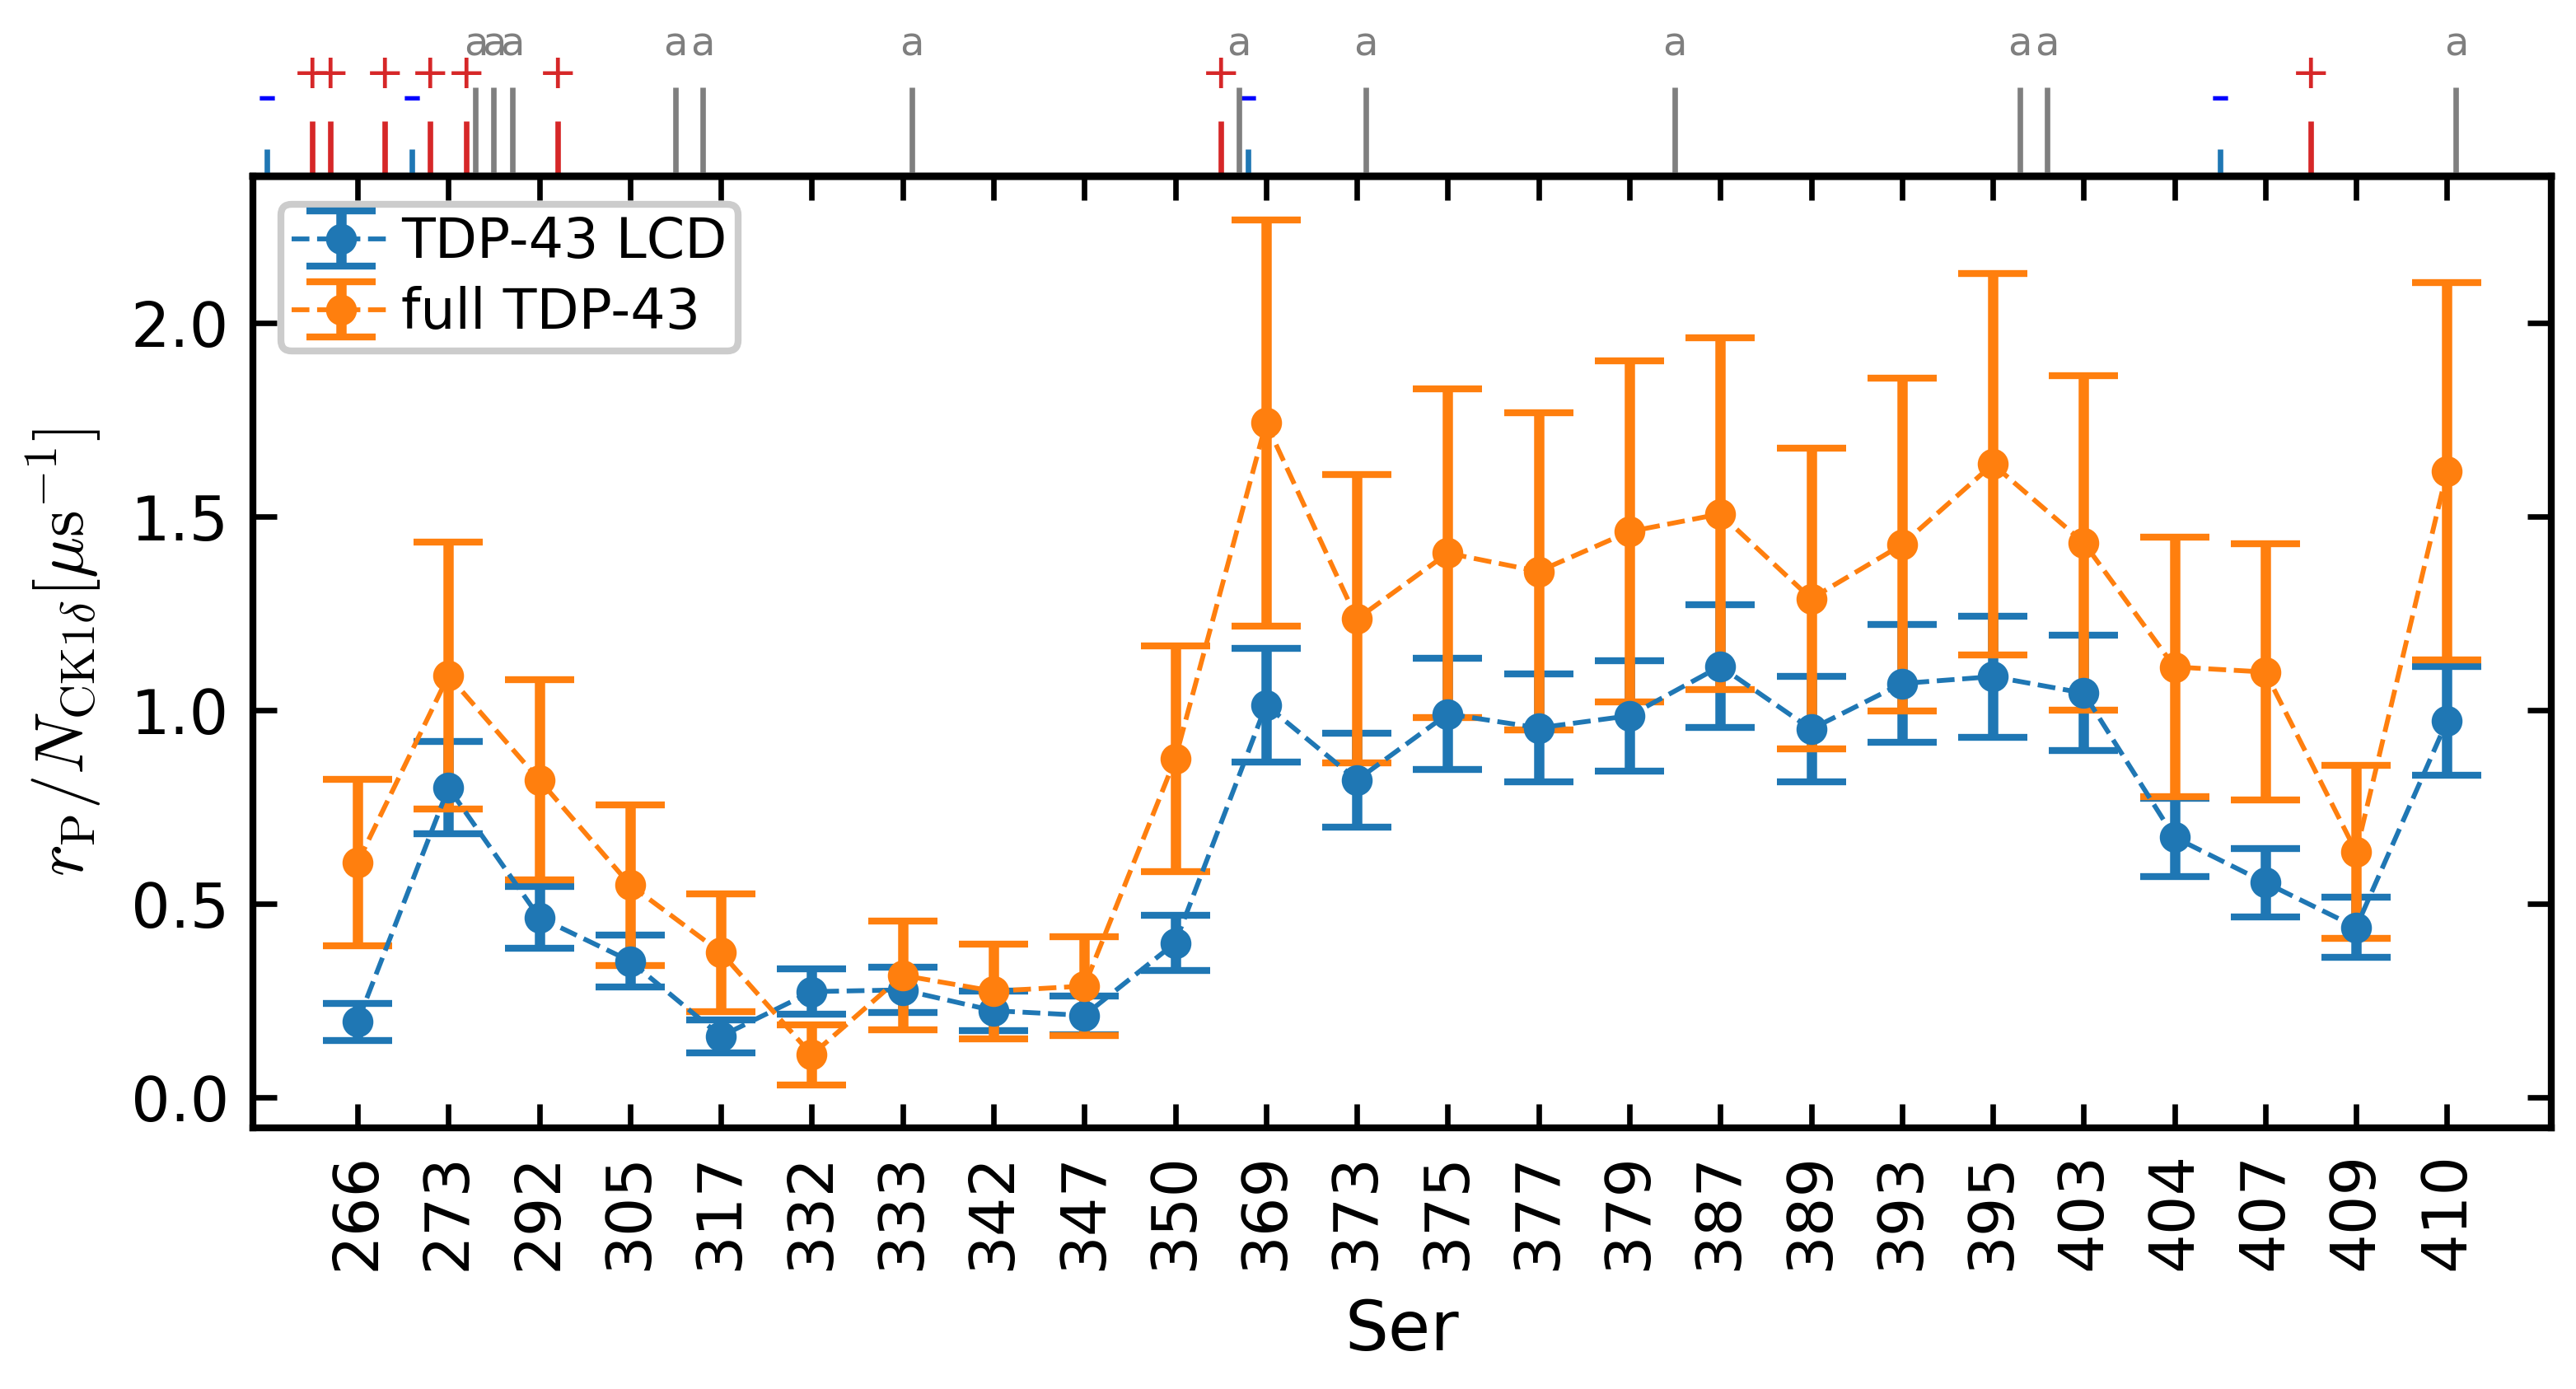

In [23]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rp, drp, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"TDP-43 LCD")
ax1.errorbar(np.arange(1,25), rp_ftdp, drp_ftdp, fmt='.--', color='tab:orange', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"full TDP-43")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

## 2 TDP-43 LCD, 1 CK1d, 1 pp3 

In [29]:
(rp_k, rp_p), (drp_k, drp_p) = hpar.count_contacts(dirpath=path_new+'sim_ph_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_ph_contacts.txt', 
                                              ser_l=ser_i, n_sims=25, type_of_contact=1, len_prot=154, n_prot=2, max_dist=1.05, nenz=2)

(rdp_k, rdp_p), (drdp_k, drdp_p) = hpar.count_contacts(dirpath=path_new+'sim_ph_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_ph_contacts.txt', 
                                              ser_l=ser_i, n_sims=25, type_of_contact=-1, len_prot=154, n_prot=2, max_dist=1.05, nenz=2)

(rc_k, rc_p), (drc_k, drc_p) = hpar.count_contacts(dirpath=path_new+'sim_np_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_np_contacts.txt', 
                                              ser_l=ser_i, n_sims=10, type_of_contact=None, len_prot=154, n_prot=2, max_dist=1.05, nenz=2)



In [56]:
def pSer_per_chain(dirpath, file_suffix, ser_l, n_sims, times, len_prot=154, n_prot=2):
    
    if isinstance(n_sims, int):
        sims_list = [s for s in range(n_sims)]
    elif isinstance(n_sims, list):
        sims_list = n_sims
    else:
        raise ValueError('n_sims must be int or list of int!')
        
    pSer_per_chain = np.zeros((len(sims_list)*n_prot, len(times)))
    for ns, s in enumerate(sims_list):
        with gsd.hoomd.open(dirpath+f"/sim{s+1}_{file_suffix}", 'rb') as input_gsd:
            for i, tt in enumerate(tqdm(times)):
                frame = input_gsd[int(tt)]
                type_ids = frame.particles.typeid[:len_prot*n_prot]
                pSer_per_chain[ns*2:(ns+1)*2, i] = [ np.sum( type_ids[len_prot*ichain:len_prot*(ichain+1)]==20 ) for ichain in range(n_prot) ]

    return np.mean(pSer_per_chain, axis=0), np.std(pSer_per_chain, axis=0)/np.sqrt(len(sims_list)*n_prot -1)
    

In [57]:
times = np.arange(0,1000,10)
len(times)

100

In [58]:
pSer, d_pSer = pSer_per_chain(dirpath=path_new+'sim_ph_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_ph_dump.gsd', 
                                              ser_l=ser_i, n_sims=25, times=times)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 103.98it/s]


Text(0, 0.5, 'N_pSer per chain')

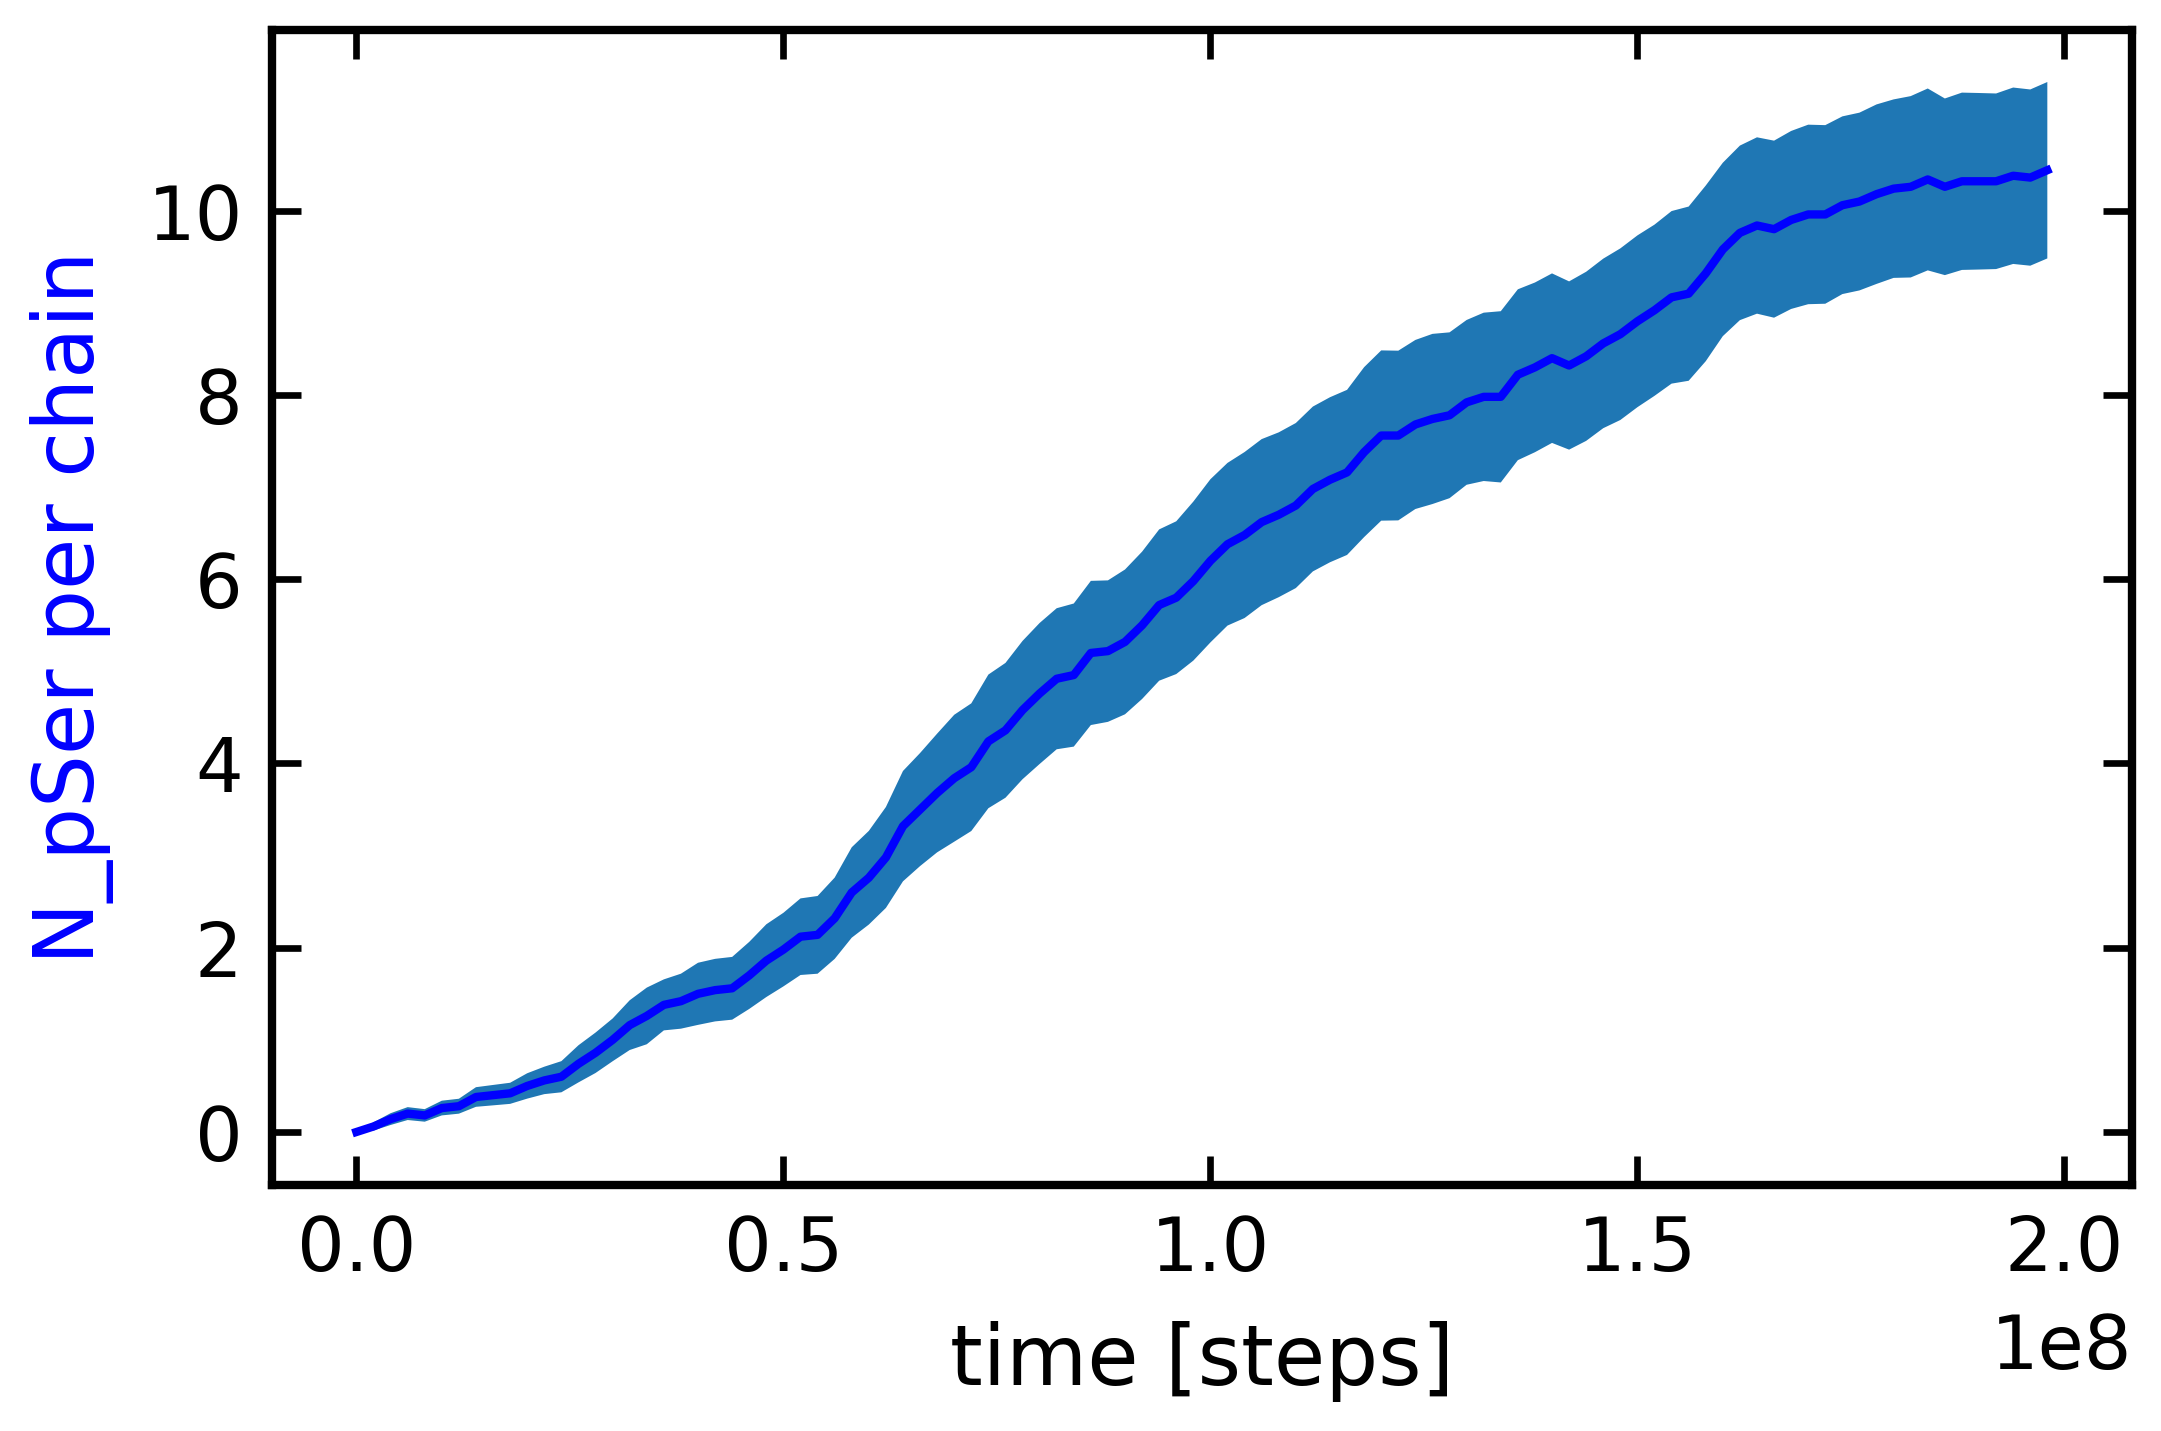

In [61]:
time_step = times*200000

fig, ax1 = plt.subplots(figsize=(4, 2.5))

# Plot the first array with the primary y-axis
ax1.plot(time_step, pSer, 'b')
ax1.fill_between(time_step, pSer-d_pSer, pSer+d_pSer)
ax1.set_xlabel('time [steps]')
ax1.set_ylabel('N_pSer per chain', color='b')

#ax1.legend(ncols=3, loc='lower right')

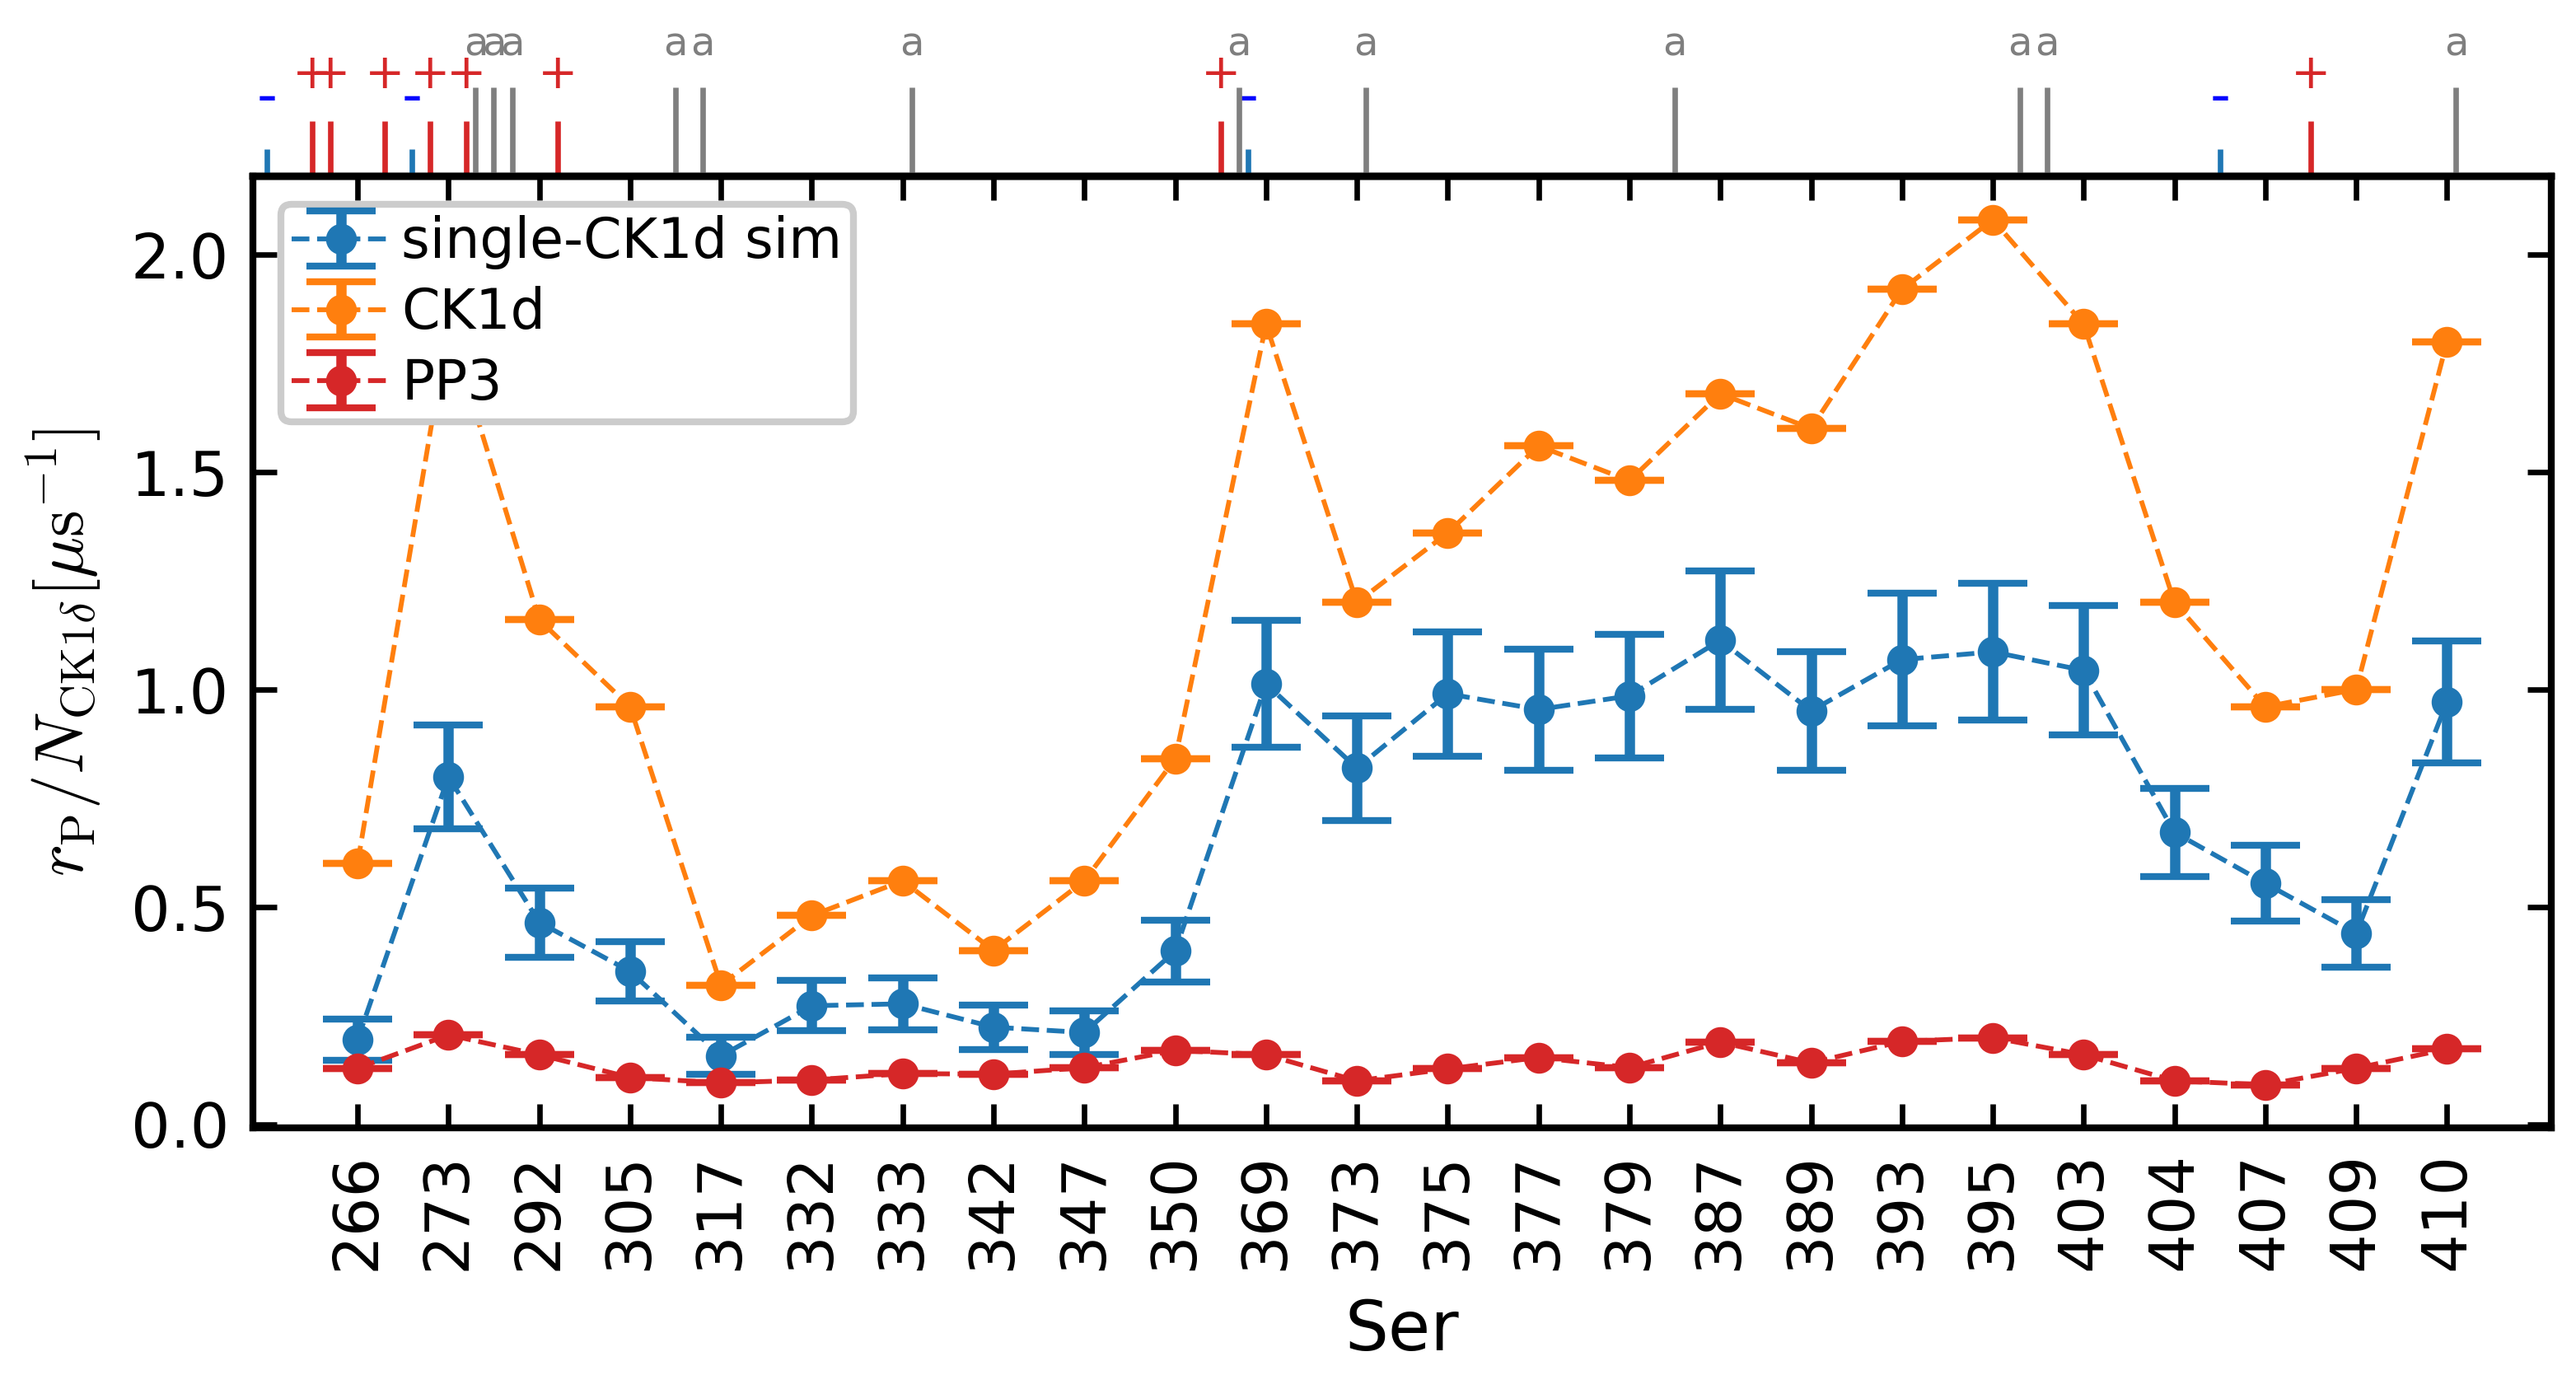

In [30]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rp, drp, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"single-CK1d sim")
ax1.errorbar(np.arange(1,25), rp_k, drp_k, fmt='.--', color='tab:orange', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d")
ax1.errorbar(np.arange(1,25), rp_p, drp_p, fmt='.--', color='tab:red', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

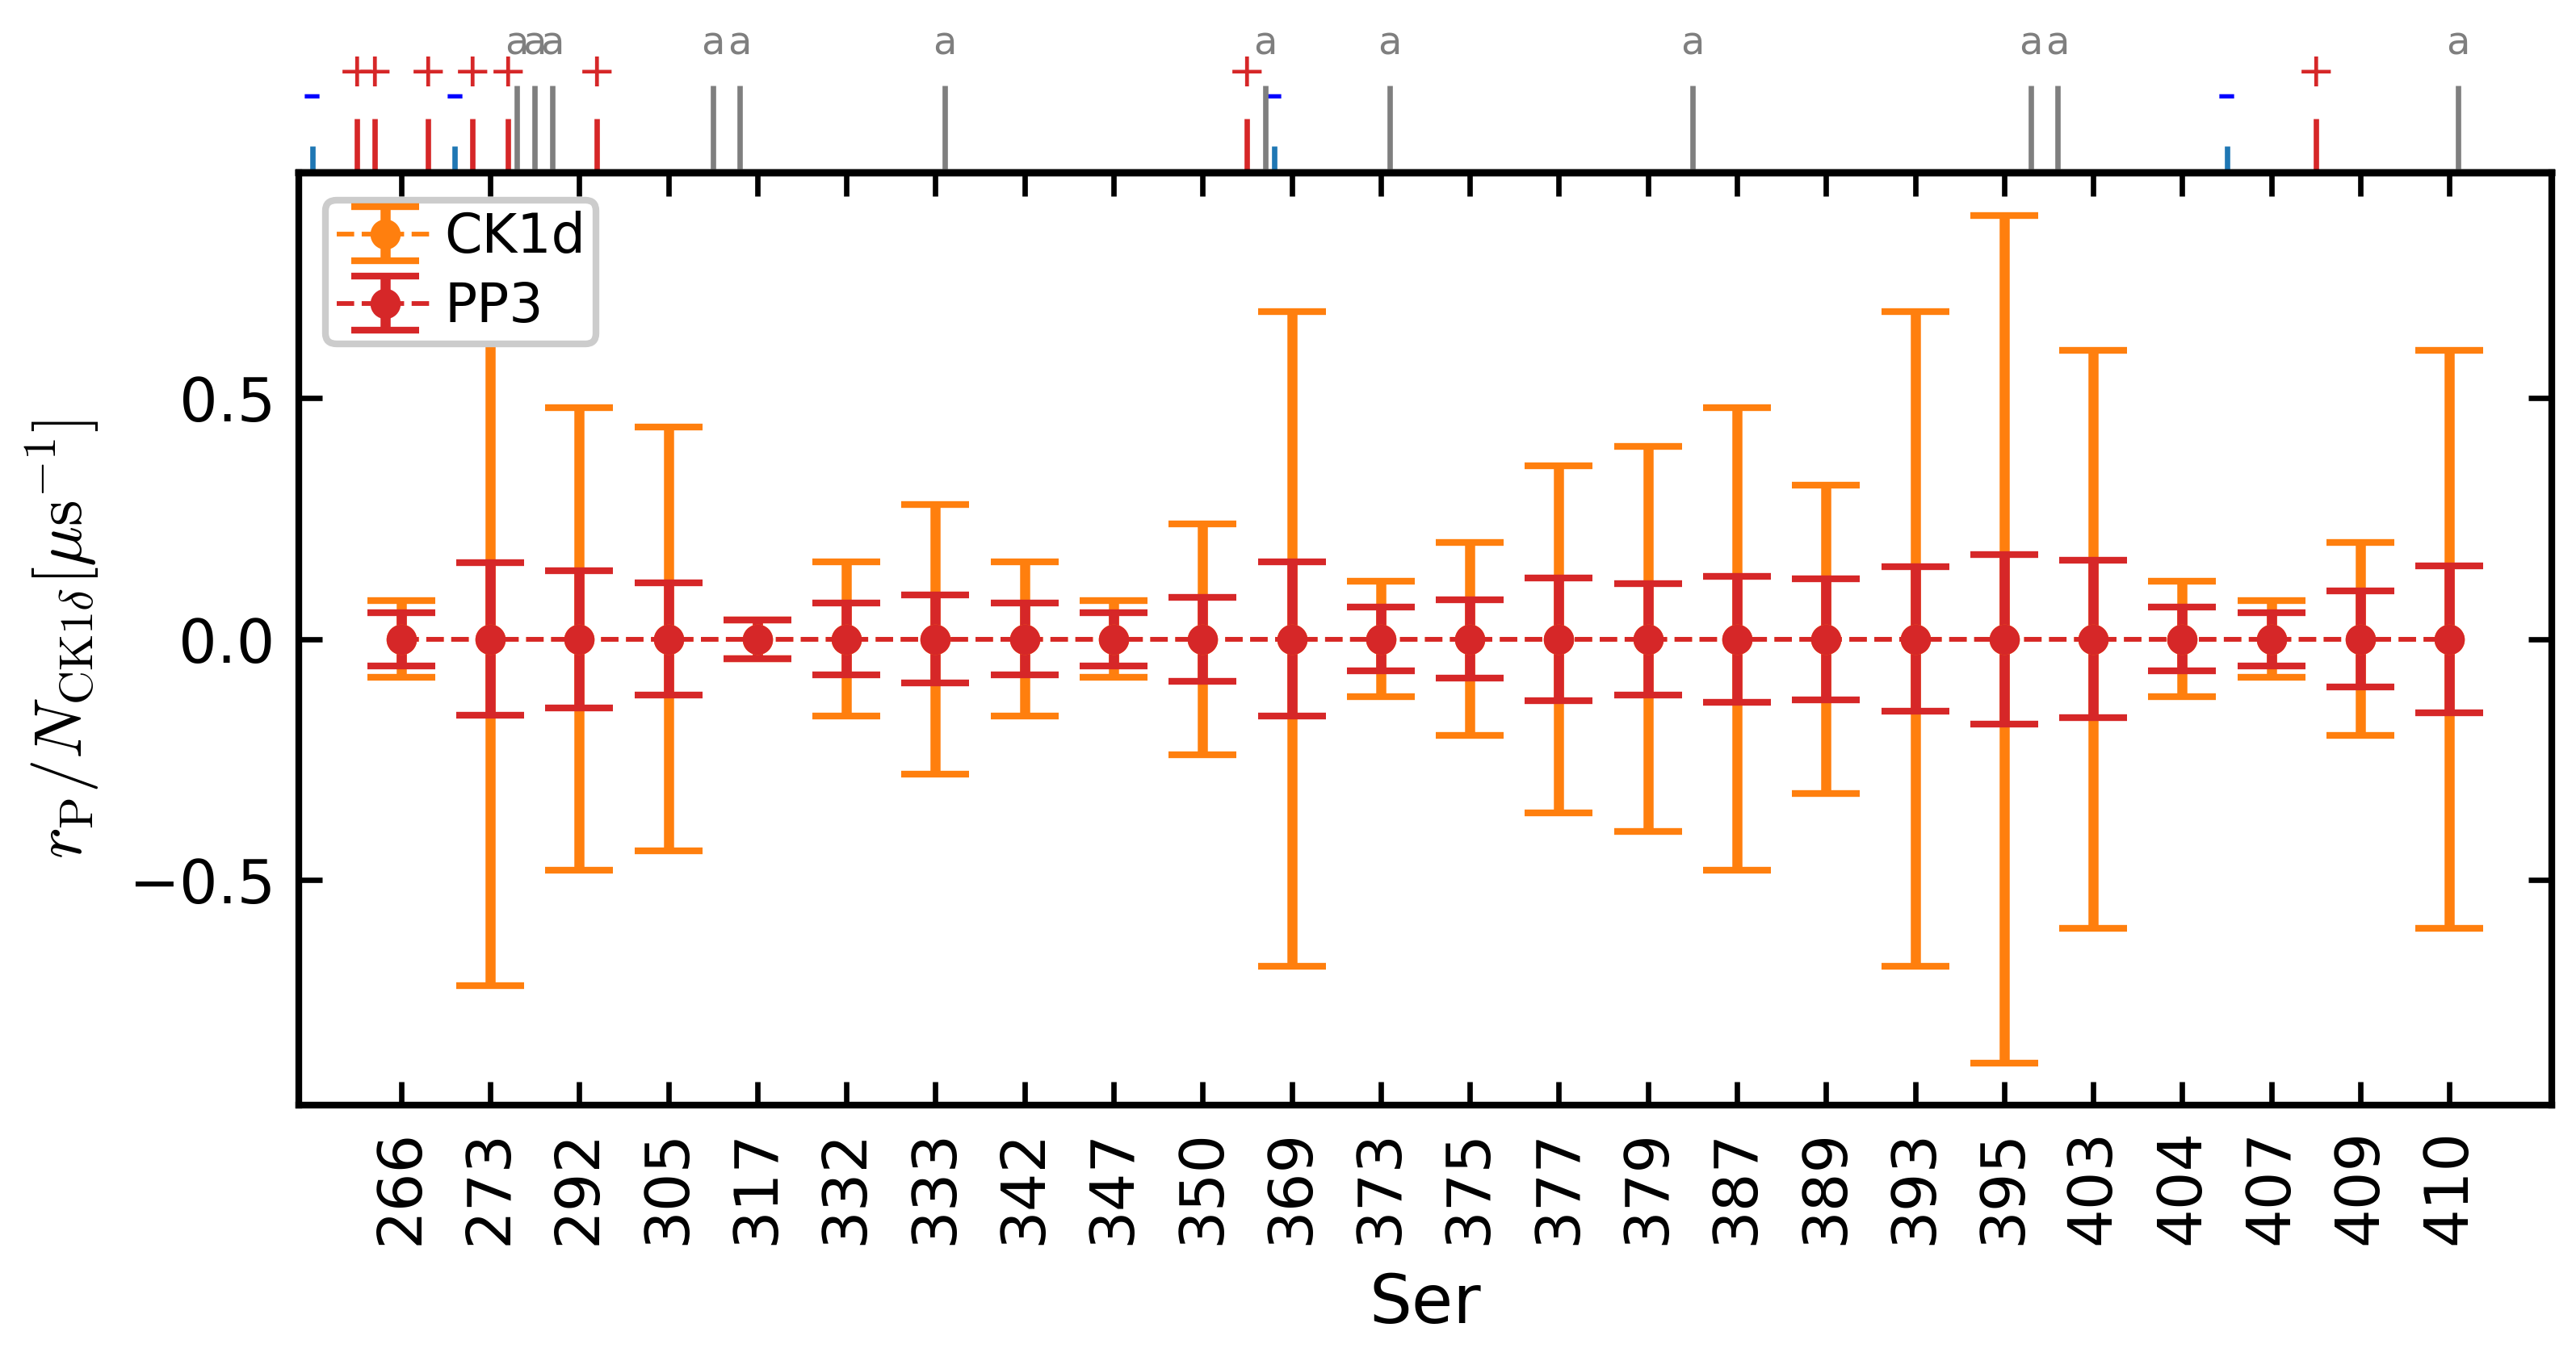

In [31]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rdp_k, drdp_k, fmt='.--', color='tab:orange', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d")
ax1.errorbar(np.arange(1,25), rdp_p, drdp_p, fmt='.--', color='tab:red', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()